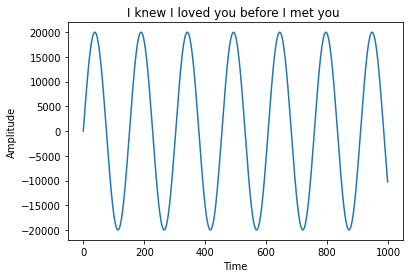

In [1]:
#Mark Vincent R. Gallemit
#CpE-3204

#!/usr/bin/python
import numpy as np
from scipy import signal
import wave
import struct
import sys
from IPython.display import Audio
from IPython.core.display import display
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

num_samples = 50000
sampling_rate = num_samples
#num_samples = 48000 #48000
#sampling_rate = 48000 #48000.0
amplitude = 20000 # 16000
comptype = 'NONE'
compname = 'not compressed'
nchannels = 1
sampwidth = 2
FILE_NAME = 'test.wav'


#I based my notes on SINEwaves
#It sounds like a flute

def C( play_time):
    # generate the C
    
    new_wave = [np.sin(2 * np.pi *261.63 * x/sampling_rate) for x in range(int(num_samples * play_time))]
    return(new_wave)

def D(play_time):
    # generate the D
    
    new_wave = [np.sin(2 * np.pi *293.66 * x/sampling_rate) for x in range(int(num_samples * play_time))]
    return(new_wave)

def E(play_time):
    # generate the E
    
    new_wave = [np.sin(2 * np.pi *329.63 * x/sampling_rate) for x in range(int(num_samples * play_time))]
    return(new_wave)

def F( play_time):
    # generate the F
    
    new_wave = [np.sin(2 * np.pi *349.23 * x/sampling_rate) for x in range(int(num_samples * play_time))]
    return(new_wave)

def G(play_time):
    # generate the G
    
    new_wave = [np.sin(2 * np.pi *392.00 * x/sampling_rate) for x in range(int(num_samples * play_time))]
    return(new_wave)

def A(play_time):
    # generate the A
    
    new_wave = [np.sin(2 * np.pi *220.00  * x/sampling_rate) for x in range(int(num_samples * play_time))]
    return(new_wave)

def B( play_time):
    # generate the B
    
    new_wave = [np.sin(2 * np.pi * 246.94 * x/sampling_rate) for x in range(int(num_samples * play_time))]
    return(new_wave)

def RAN( frequency,play_time):
    # generate other frequencies that not define
    
    new_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(int(num_samples * play_time))]
    return(new_wave)



def writeWave(created_wave):
    file = FILE_NAME
    nframes = num_samples
    wav_file = wave.open(file, 'w')
    wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))
    for s in created_wave:
        # struct.pack with the parameter 'h' means that we're
        # writing the data as binaries, not just the numbers.
        # 'h' stands for hexadecimal.
        # This allows for music players to read the data.
        wav_file.writeframes(struct.pack('h', int(s*amplitude)))


Created_wave=       E(0.4)+F(0.5)+G(0.4 )+G(.9)           +C(0.5)+G(0.5)+F(0.9)+           E(0.5)+D(0.5)+D(0.9)+E(1.2)      +E(0.5)+F(0.5)+G(0.4 )+G(0.9)        + RAN(523.2511,0.8) + RAN(493.8833,0.8) + RAN(523.2511,0.8) +G(1.5)          +E(0.5)+F(0.5)+G(0.4 )+G(1)            +C(0.5)+G(0.5)+F(0.8)+        E(0.9)+D(1)+E(0.9)         +E(0.5)+F(0.5)+G(0.4 )+G(0.9)               + RAN(523.2511,0.8) +RAN(587.3295,0.8)+RAN(523.2511,0.8)  +G(0.8)

writeWave(Created_wave)
display(Audio(FILE_NAME))



    # read audio samples
input_data = read(FILE_NAME)
audio = input_data[1]
    # plot the first 50 samples
plt.plot(audio[0:1000 ])
    # label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
    # set the title  
plt.title("I knew I loved you before I met you ") 
    # display the plot
plt.show()        

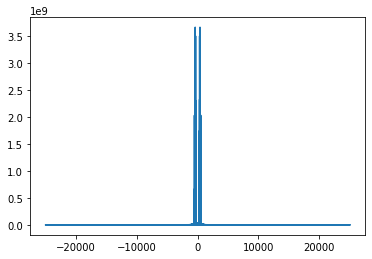

In [2]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
SAMPLE_RATE = num_samples
DURATION = 2

N = SAMPLE_RATE * DURATION

input = read(FILE_NAME)
tone = input[1]

#The code calls two very important functions:
#fft() calculates the transform itself.
#fftfreq() calculates the frequencies in the center of each bin in the output of fft(). Without this, there would be no way to plot the x-axis on your frequency spectrum.

normalized_tone = np.int16((tone / tone.max()) * 32767)

yf = fft(normalized_tone)
xf = fftfreq(1295000, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

the frequencies observed in the graph

*329.63

*349.23

*392.00

*261.63

*293.66

*523.2511

*493.8833

*587.3295


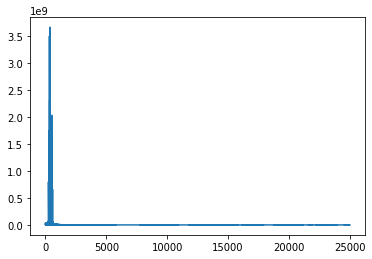

In [3]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(1295000, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

the frequencies observed in the graph

*329.63

*349.23

*392.00

*261.63

*293.66

*523.2511

*493.8833

*587.3295

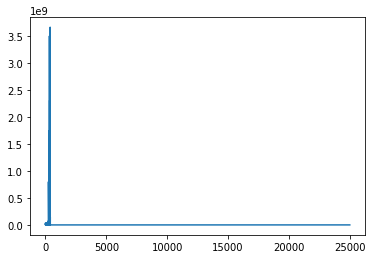

In [4]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 400)
#target_idx1 = int(points_per_freq * 400)


yf[target_idx - 1 : -1] = 0
#yf[target_idx1 - 1 : target_idx1 + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

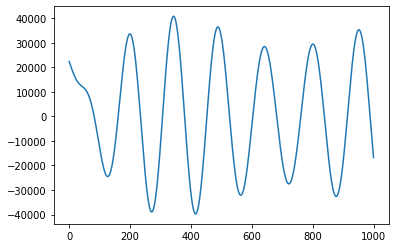

In [5]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

OBSERVATION IN THE GRAPH

It shows different amplitudes

In [6]:
from scipy.io.wavfile import write
New_audio = "filtered_YOUTH"
write(New_audio, sampling_rate, new_sig.astype(np.int16))

input_fil = read(New_audio)
filtered_tone = input_fil[1]
display(Audio(data=filtered_tone, rate=SAMPLE_RATE))

observation on the new audio

It sounds like a broken radio and it doesn't play the tones with high frequencies